# Parametric Tests

## Parametric testing of the initialization of the Bonding Curve

In [1]:
import sys
sys.path.append('../')

### cadCAD Specification Diagram

In [2]:
# For displaying image files
from IPython.display import Image

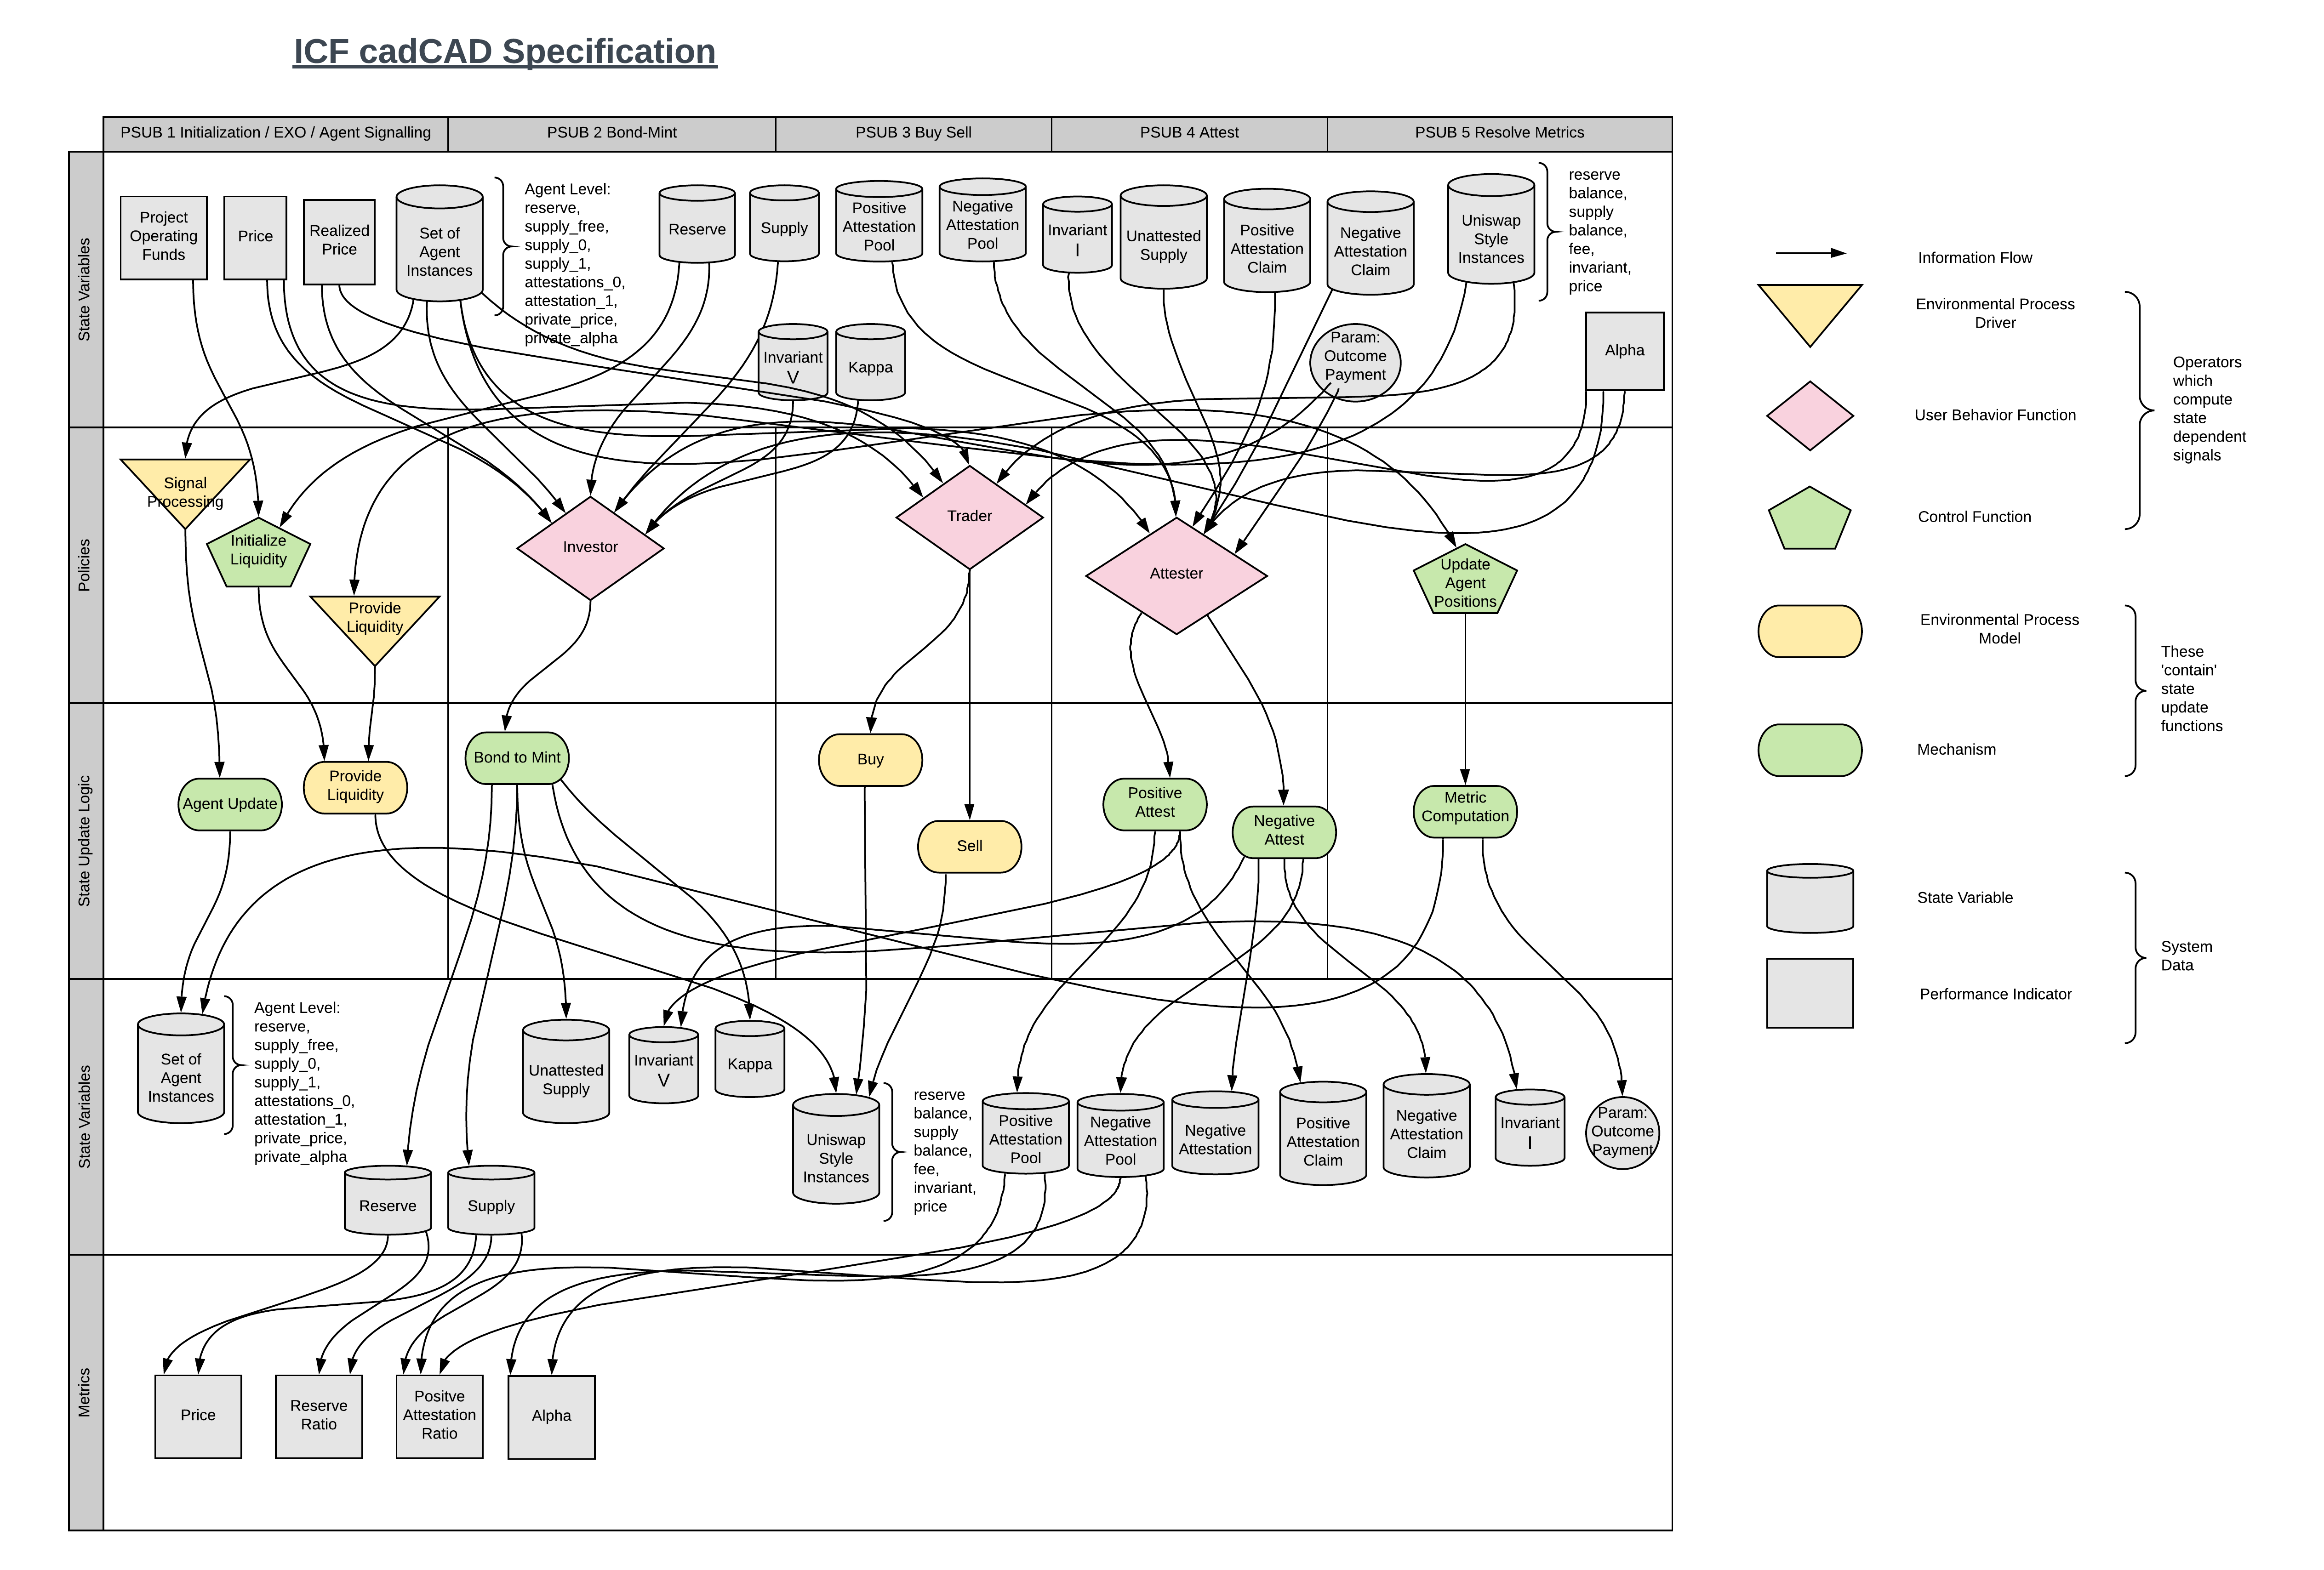

In [3]:
Image("..\images\Phase_3_secondary.png")
# print(sys.path)

### Import Libraries for Analysis and Visualization

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

### Installed cadCAD Installed Version Check

In [5]:
pip freeze | grep cadCAD

cadCAD==0.4.23
Note: you may need to restart the kernel to use updated packages.


### Import Parent cadCAD Model and Utilities

In [6]:
from cadCAD.configuration import Experiment

from cadCAD import configs

from src.config_wrapper import ConfigWrapper

from src import run_wrapper2
from src import run_wrapper

import src.sim as sim

# custom plotting function
from src.utils import param_test_plot

### Choose number of Monte Carlo runs ('N') and/or number of Timesteps ('T') and/or to update parameter values ('M') 

### Current N, T, and M

In [7]:
# get list of keys and values from M
parametric_experiment = ConfigWrapper(sim)
model_keys = parametric_experiment.get_config()
model_keys[0]

{'N': 1,
 'T': range(0, 500),
 'M': {'starting_kappa': 2,
  'starting_alpha': 0.03536977491961415,
  'money_raised': 66000,
  'monthly_instalment': 3000,
  'C': 72000,
  'f': 0.03,
  'm': 0.15,
  'beta': 0.9,
  'dust': 1e-08,
  'period': 1200,
  'rules_price': 'martin',
  'E': 0.2,
  'ENABLE_CONTINUOUS': True,
  'THETA': 0.9,
  'ENABLE_BURN': False,
  'fee_numerator': 997,
  'fee_denominator': 1000,
  'alpha_bias': 1,
  'price_bias': 1,
  'kappa_rule': 'none'}}

### Choose a parameter and list of values to sweep over

In [8]:
update_params = {
    'ENABLE_BURN' : [False],
    # 'monthly_instalment' : [3000],
    # 'money_raised' : [6000],
    'THETA' : [0.9],
    # 'C' : [70000, 80000, 90000, 100000] 
}

### Update Timesteps, if desired
Current Number of TImesteps

In [9]:
# Original
New_Timesteps = model_keys[0]['T']

# New Change Value
New_Timesteps = range(365)
New_Timesteps

range(0, 365)

### Update Monte Carlo Runs, if desired
Current Number of Runs

In [10]:
# Original
New_Runs = model_keys[0]['N']

# New Change Value
# New_Runs = 10
New_Runs

1

In [11]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [12]:
parametric_experiment.get_config()

[{'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.03536977491961415,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72000,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'alpha_bias': 1,
   'price_bias': 1,
   'kappa_rule': 'none'}}]

### Get Initial Conditions from Config

In [13]:
initial_state = parametric_experiment.get_initial_conditions()
initial_state

{'reserve': 6599.999999999998,
 'pbar': 1,
 'realized_price': 0,
 'spot_price': 1,
 'kappa': 2,
 'supply': 13199.999999999996,
 'alpha': 0.0003362783161627586,
 'alpha_bar': 0.0003362783161627586,
 'supply_0': 30000,
 'supply_1': 100,
 'supply_free': -16900.000000000004,
 'attestations': 30000,
 'attestations_0': 30000,
 'attestations_1': 100,
 'invariant_V': 26399.999999999993,
 'invariant_I': 9146.623794212217,
 'agents':    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0   0                     0                     0            100   
 1   1                     0                     0            100   
 
    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
 0               0               0                  0                  0.5   
 1               0               0                  0                  0.5   
 
    agent_private_price  agent_private_alpha_signal  \
 0                  0.5                           0   
 1                

### Update Agents

#### Choose Number of Agents

In [14]:
number_of_agents = 18

In [15]:
########## AGENT INITIALIZATION ##########
PRIVATE_ALPHA = 0.5
PRIVATE_PRICE = 0.5

r = 100  # Agent reserve, the amount of fiat tokens an agent starts with
s = 0
s1 = 0
s0 = 0
s_free = s - (s1+s0)
# Configure agents for agent-based model
agents_df = pd.DataFrame({
    'agent_attestations_1': 0,
    'agent_attestations_0': 0,
    'agent_reserve': r,
    'agent_supply_1': s1,
    'agent_supply_0': s0,
    'agent_supply_free': s_free,
    'agent_private_alpha': PRIVATE_ALPHA,
    'agent_private_price': PRIVATE_PRICE,    
    'agent_private_alpha_signal': 0,
    'agent_private_price_signal': 0,
    'agent_public_alpha_signal': 0,
    'agent_public_price_signal': 0}, index=[0])
agents_df = pd.concat([agents_df]*number_of_agents, ignore_index=True)
# Adding IDs to agents
agents_df.insert(0, 'id', range(0, len(agents_df)))

agents_df['agent_private_alpha'] = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

agents_df['agent_private_price'] = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

# SAMPLE for agent 0 to attest 3 new yes tokens
# agents_df['agent_supply_1'][0] = agents_df['agent_supply_1'][0] + 3


### Update Agent into Initial State

In [16]:
initial_state['agents'] = agents_df

### Re-Instantiate Config with Updated Initial Conditions

In [17]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [18]:
parametric_experiment.get_initial_conditions()

{'reserve': 6599.999999999998,
 'pbar': 1,
 'realized_price': 0,
 'spot_price': 1,
 'kappa': 2,
 'supply': 13199.999999999996,
 'alpha': 0.0003362783161627586,
 'alpha_bar': 0.0003362783161627586,
 'supply_0': 30000,
 'supply_1': 100,
 'supply_free': -16900.000000000004,
 'attestations': 30000,
 'attestations_0': 30000,
 'attestations_1': 100,
 'invariant_V': 26399.999999999993,
 'invariant_I': 9146.623794212217,
 'agents':     id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0    0                     0                     0            100   
 1    1                     0                     0            100   
 2    2                     0                     0            100   
 3    3                     0                     0            100   
 4    4                     0                     0            100   
 5    5                     0                     0            100   
 6    6                     0                     0            100   
 7    7      

In [19]:

del configs[:]

parametric_experiment.append()

In [20]:
parametric_experiment.get_config()

[{'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.03536977491961415,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72000,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'alpha_bias': 1,
   'price_bias': 1,
   'kappa_rule': 'none'}}]

### Generate config_ids to match results with swept variable input

In [21]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

In [22]:
config_ids

[{'M': {'starting_kappa': 2,
   'starting_alpha': 0.03536977491961415,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72000,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'alpha_bias': 1,
   'price_bias': 1,
   'kappa_rule': 'none'},
  'simulation_id': 0,
  'run_id': 0,
  'subset_id': 0}]

### Execute cadCAD Simulation

In [23]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (365, 20, 1, 19)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 1.64s


In [24]:
experiments.head()

index  reserve      pbar  realized_price  spot_price     kappa  \
0      0   6600.0  1.000000               0    1.000000  2.000000   
1      5   6600.0  1.000000               0    0.501834  1.003668   
2     10   6610.0  0.501848               0    0.496600  1.006668   
3     15   6620.0  0.496625               0    0.491585  1.009948   
4     20   6630.0  0.491621               0    0.486979  1.013918   

         supply     alpha  alpha_bar  supply_0  ...   invariant_V  \
0  13200.000000  0.000336   0.000336     30000  ...  26400.000000   
1  13200.000000  0.000336   0.000336     30000  ...      2.070839   
2  13399.263492  0.000619   0.000336     30000  ...      2.159720   
3  13600.622795  0.000924   0.000336     30000  ...      2.258513   
4  13804.031490  0.001294   0.000336     30000  ...      2.377466   

   invariant_I                                             agents  \
0  9146.623794      id  agent_attestations_1  agent_attestatio...   
1  6624.212039        id  agent_attestations_1  agent_attestat...   
2  6724.212038        id  agent_attestations_1  agent_attestat...   
3  6754.537747        id  agent_attestations_1  agent_attestat...   
4  6786.534221        id  agent_attestations_1  agent_attestat...   

                                        chosen_agent  public_alpha  \
0                                                  0             0   
1  {'id': 15, 'agent_attestations_1': 0, 'agent_a...             0   
2  {'id': 3.0, 'agent_attestations_1': 0.31182306...             0   
3  {'id': 17.0, 'agent_attestations_1': 0.3326417...             0   
4  {'id': 10.0, 'agent_attestations_1': 0.3972092...             0   

   simulation  subset run substep  timestep  
0           0       0   1       0         0  
1           0       0   1       5         1  
2           0       0   1       5         2  
3           0       0   1       5         3  
4           0       0   1       5         4  

[5 rows x 25 columns]

In [25]:
experiments.tail()

index  reserve          pbar  realized_price  spot_price     kappa  \
361   1805   6780.0  2.500000e-33               0    0.454845  1.142899   
362   1810   6780.0  2.500000e-33               0    0.454845  1.142899   
363   1815   6780.0  2.500000e-33               0    0.454845  1.142899   
364   1820   6780.0  2.500000e-33               0    0.454845  1.142899   
365   1825   6780.0  2.500000e-33               0    0.454845  1.142899   

           supply     alpha  alpha_bar  supply_0  ...  invariant_V  \
361  17036.249777  0.013456   0.000336     30000  ...    10.111217   
362  17036.249777  0.013456   0.000336     30000  ...    10.111217   
363  17036.249777  0.013456   0.000336     30000  ...    10.111217   
364  17036.249777  0.013456   0.000336     30000  ...    10.111217   
365  17036.249777  0.013456   0.000336     30000  ...    10.111217   

     invariant_I                                             agents  \
361  7748.855222        id  agent_attestations_1  agent_attestat...   
362  7748.855225        id  agent_attestations_1  agent_attestat...   
363  7748.855225        id  agent_attestations_1  agent_attestat...   
364  7748.855225        id  agent_attestations_1  agent_attestat...   
365  7748.855225        id  agent_attestations_1  agent_attestat...   

                                          chosen_agent  public_alpha  \
361  {'id': 1.0, 'agent_attestations_1': 0.72308495...             0   
362  {'id': 1.0, 'agent_attestations_1': 0.72308495...             0   
363  {'id': 5.0, 'agent_attestations_1': 0.72699256...             0   
364  {'id': 7.0, 'agent_attestations_1': 0.72332069...             0   
365  {'id': 5.0, 'agent_attestations_1': 0.72699256...             0   

     simulation  subset run substep  timestep  
361           0       0   1       5       361  
362           0       0   1       5       362  
363           0       0   1       5       363  
364           0       0   1       5       364  
365           0       0   1       5       365  

[5 rows x 25 columns]

In [26]:
len(experiments)

366

### Bonded funds are split into backing the bond (into reserve fund) and backing the project (funds_from_bond).

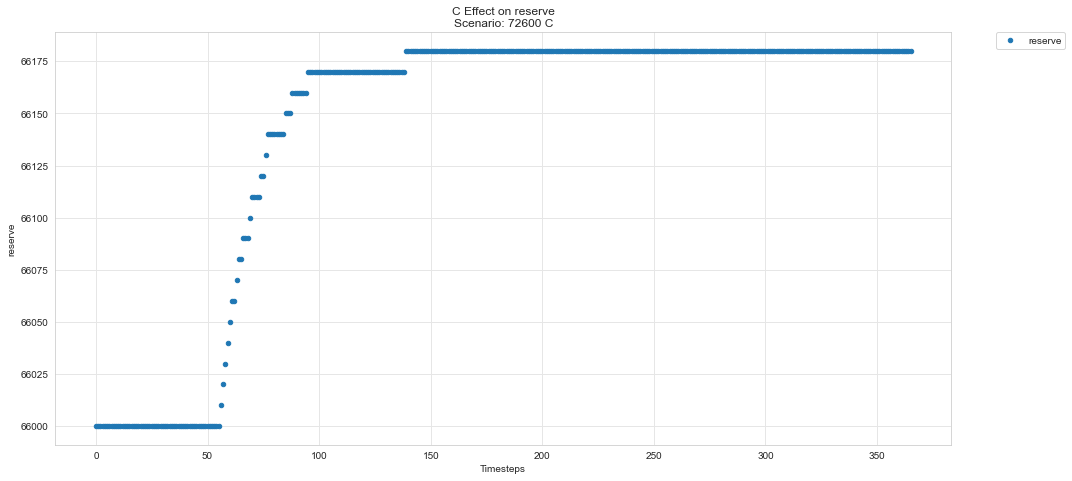

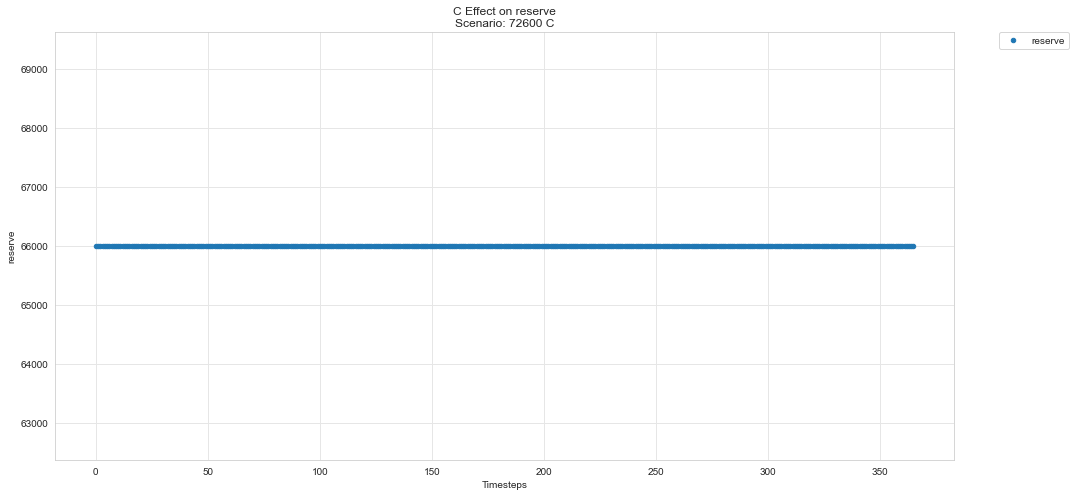

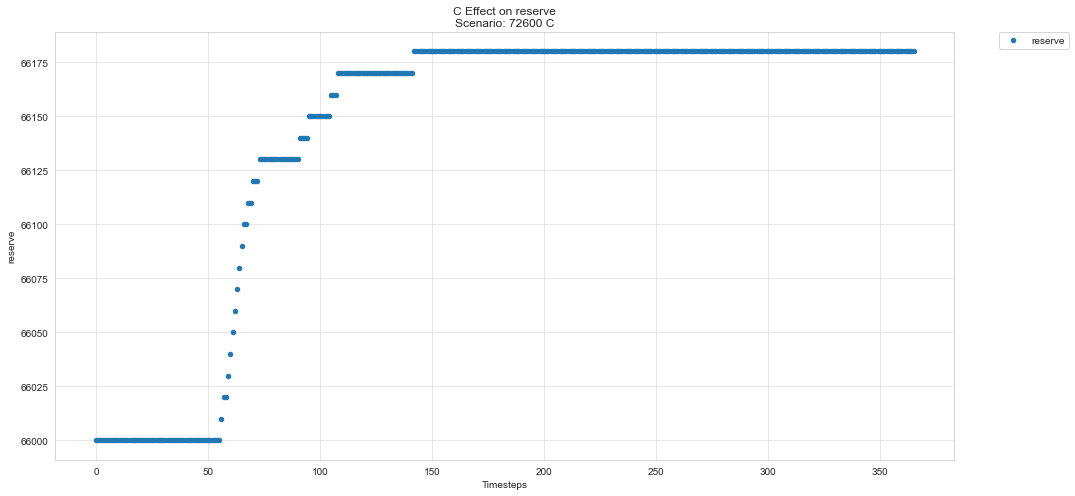

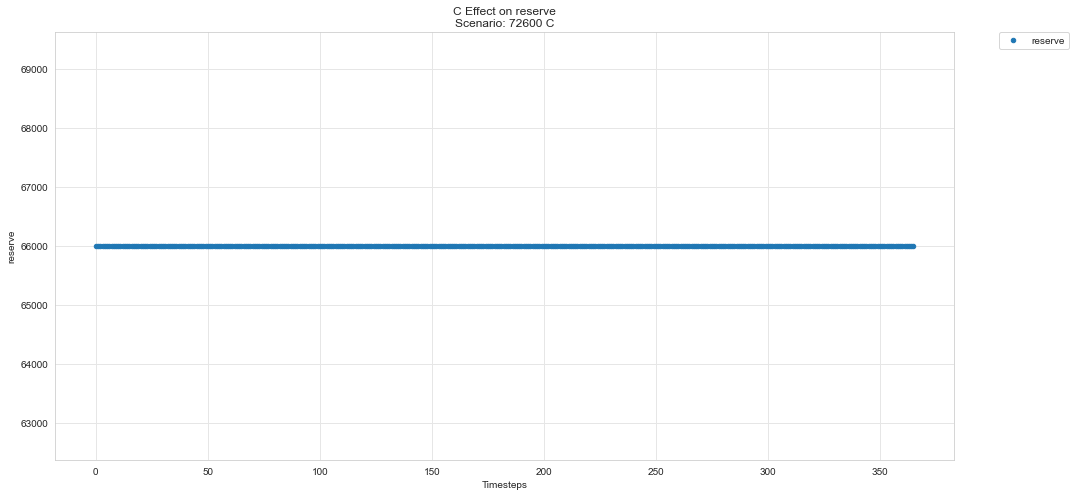

In [28]:
param_test_plot(experiments, config_ids, 'C', 'reserve')

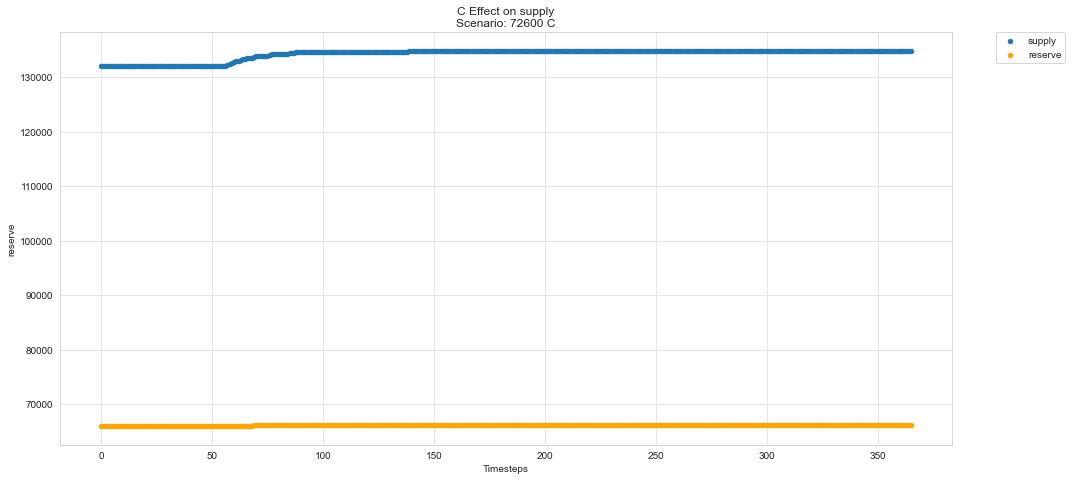

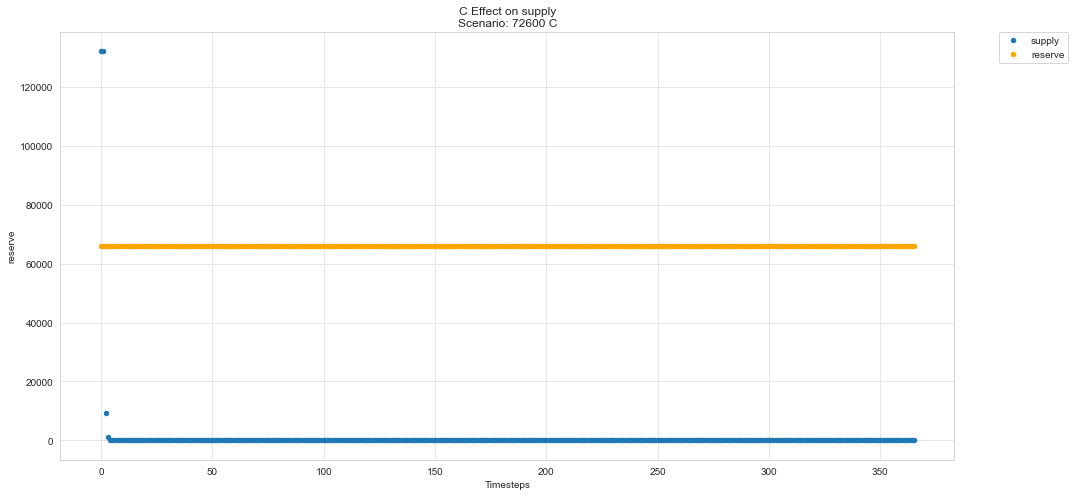

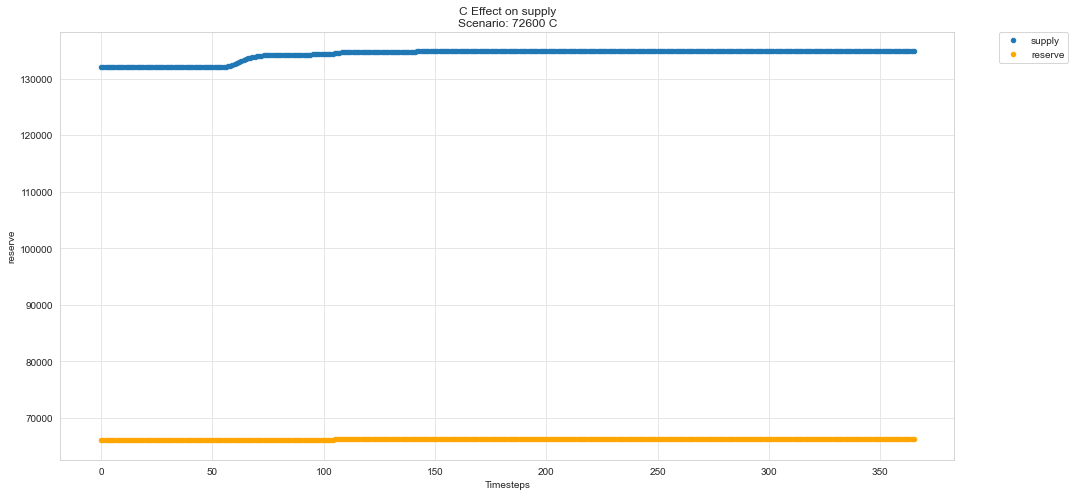

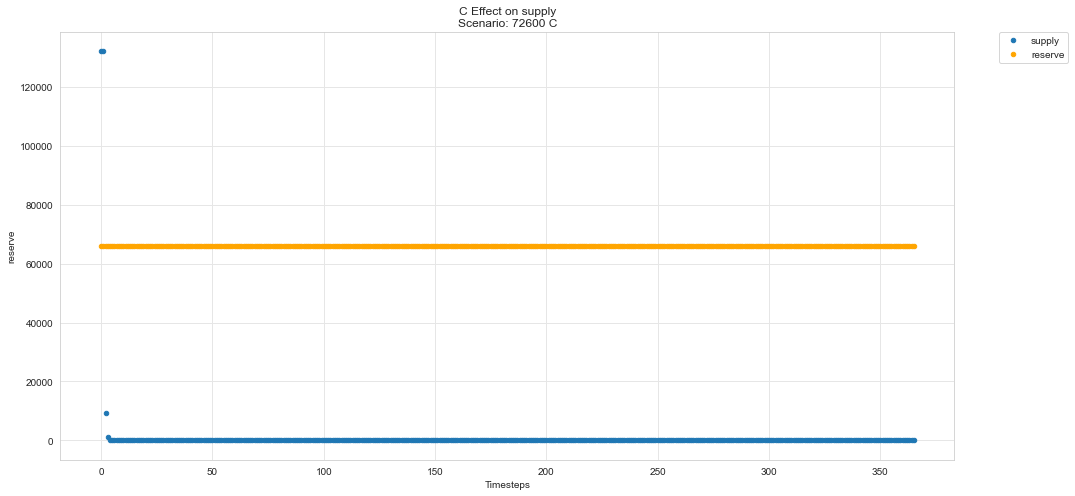

In [29]:
param_test_plot(experiments, config_ids, 'C','supply', 'reserve')

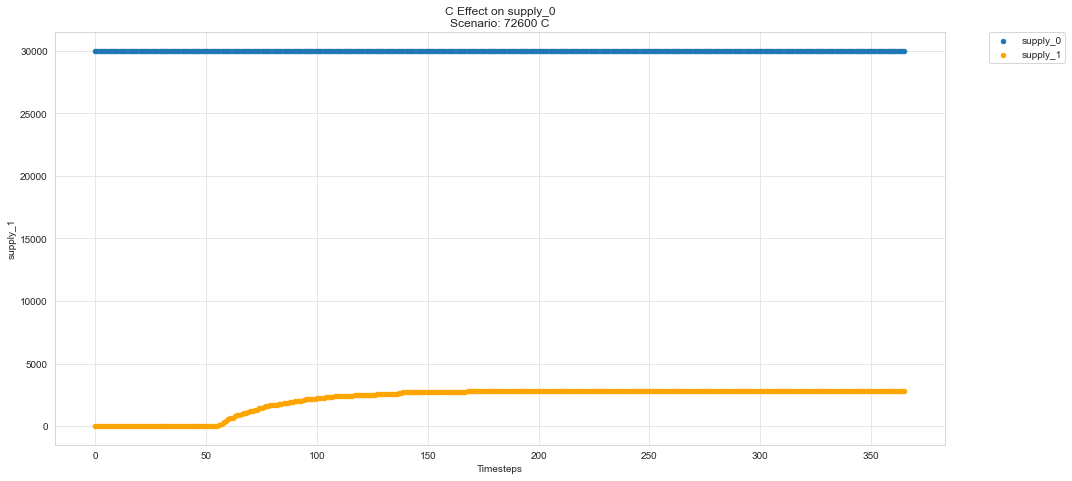

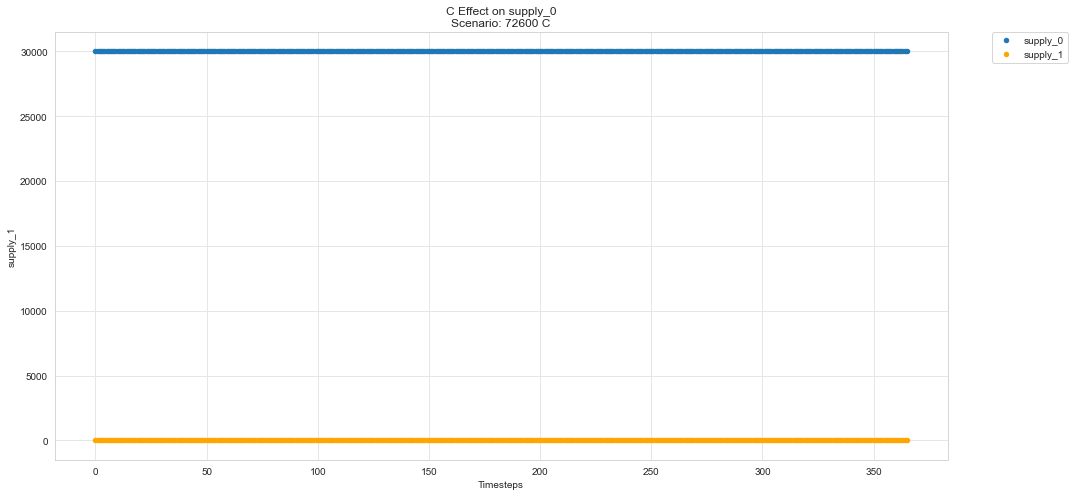

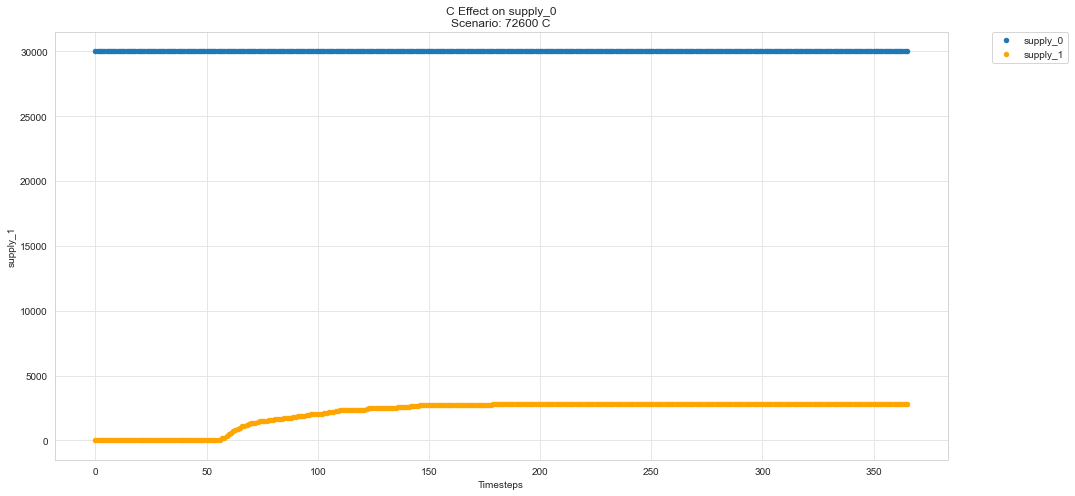

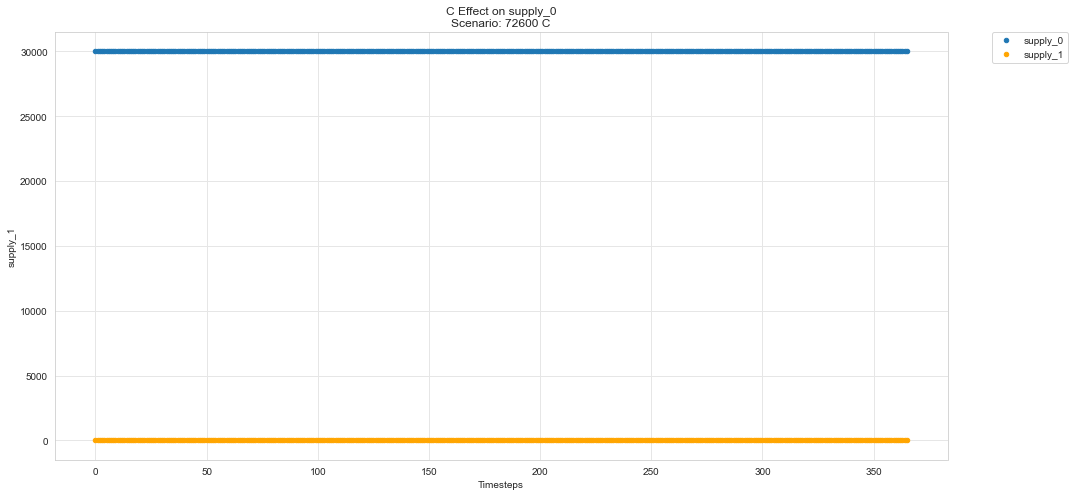

In [30]:
param_test_plot(experiments, config_ids, 'C','supply_0', 'supply_1')

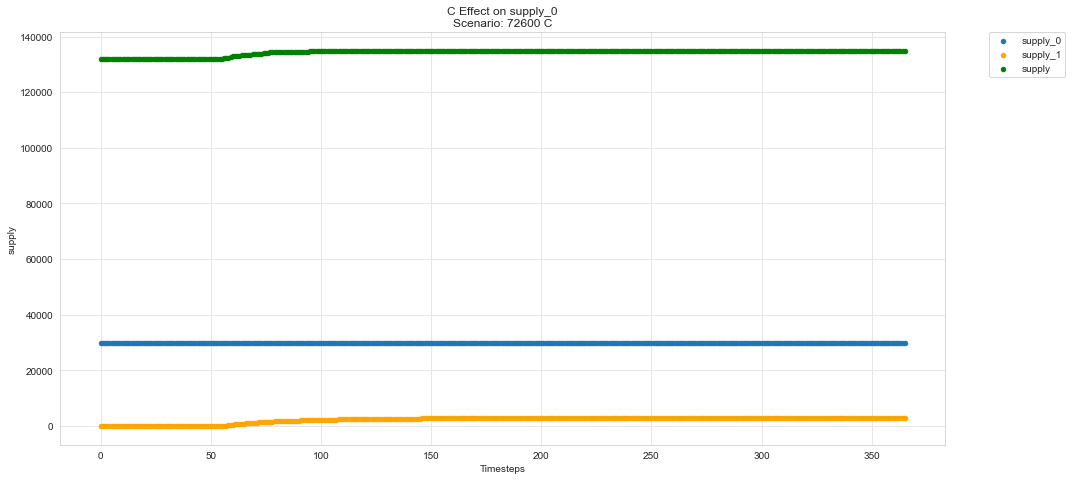

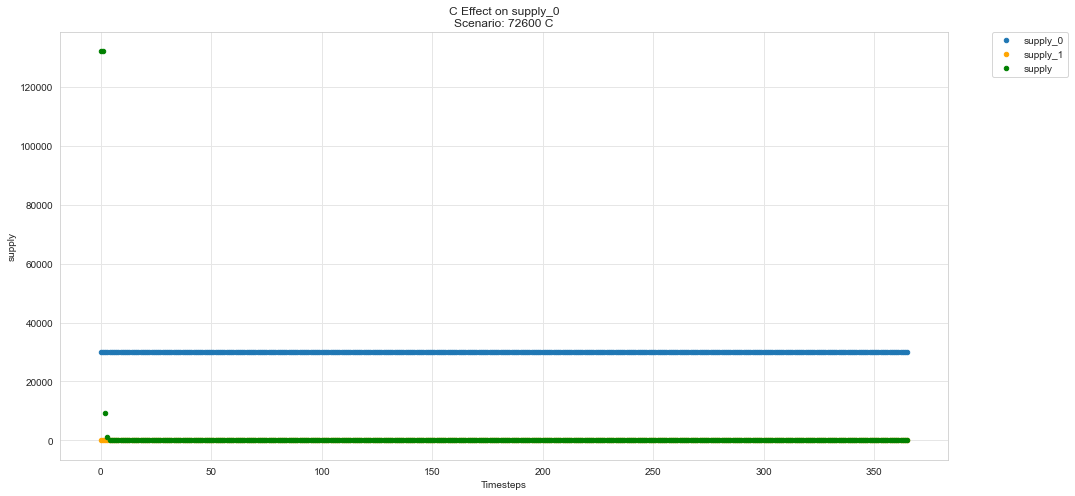

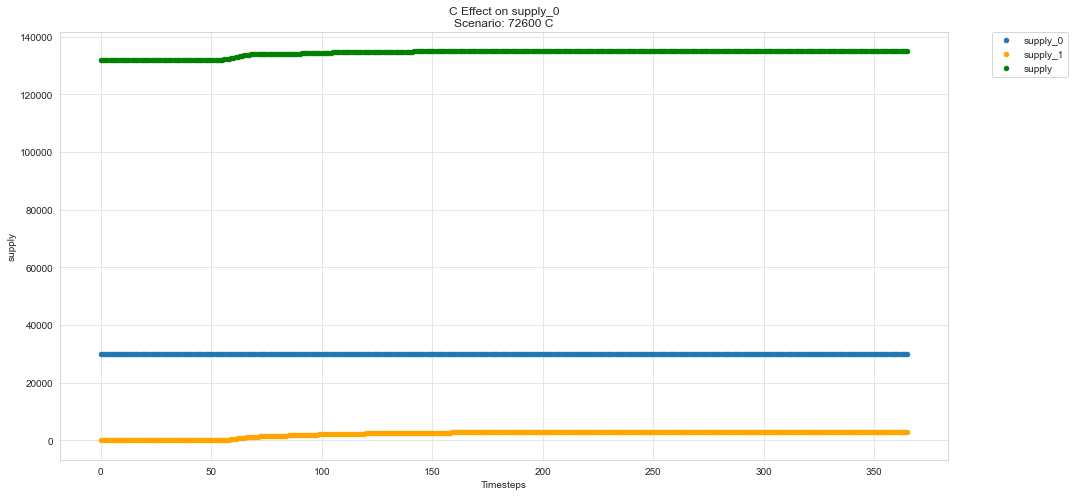

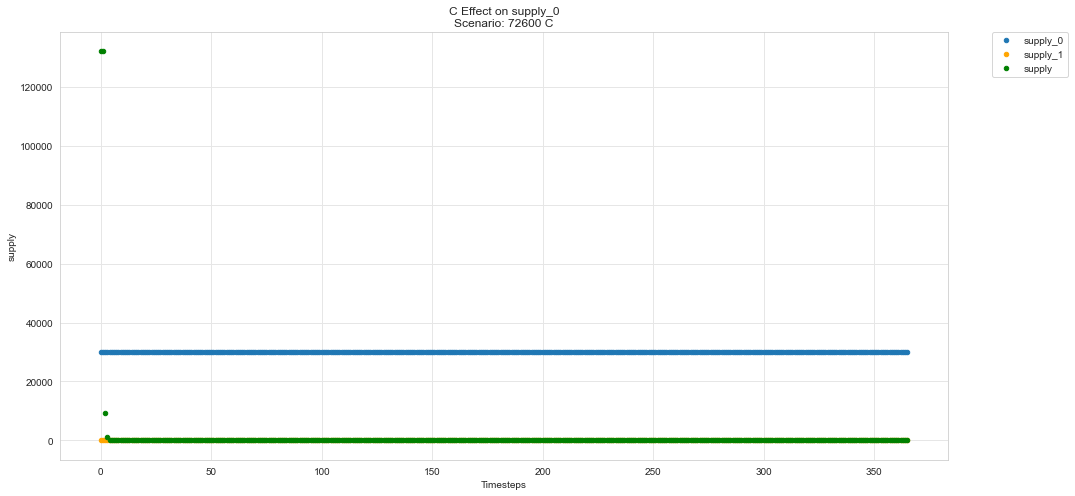

In [31]:
param_test_plot(experiments, config_ids, 'C','supply_0', 'supply_1', 'supply')

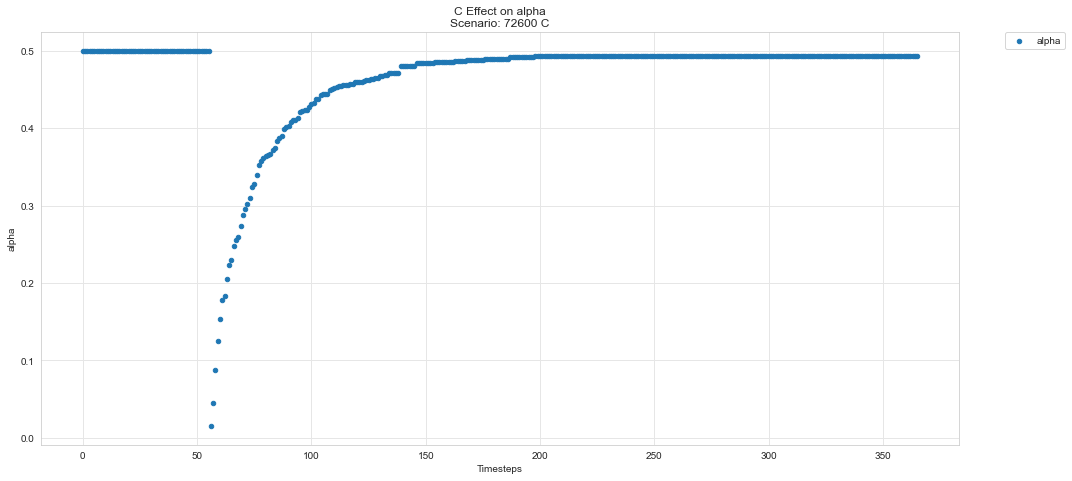

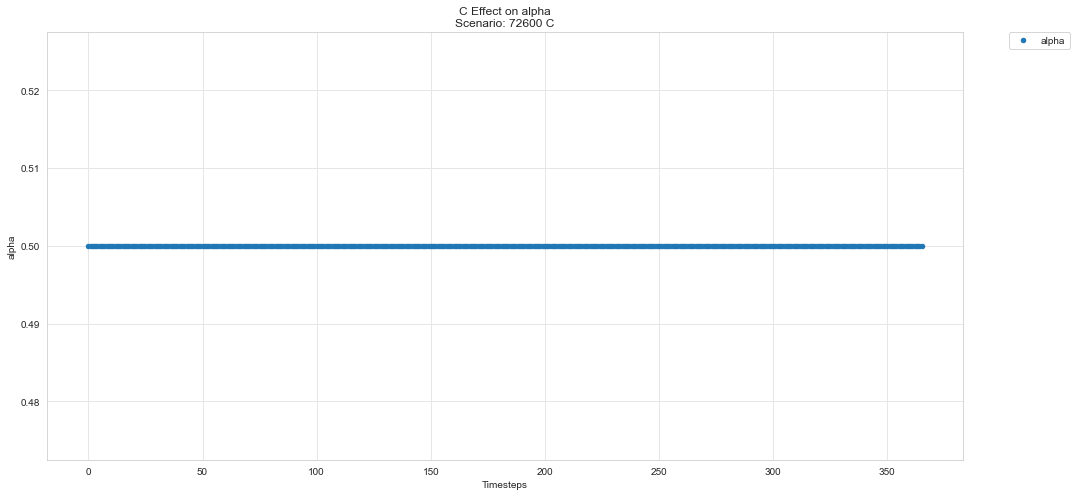

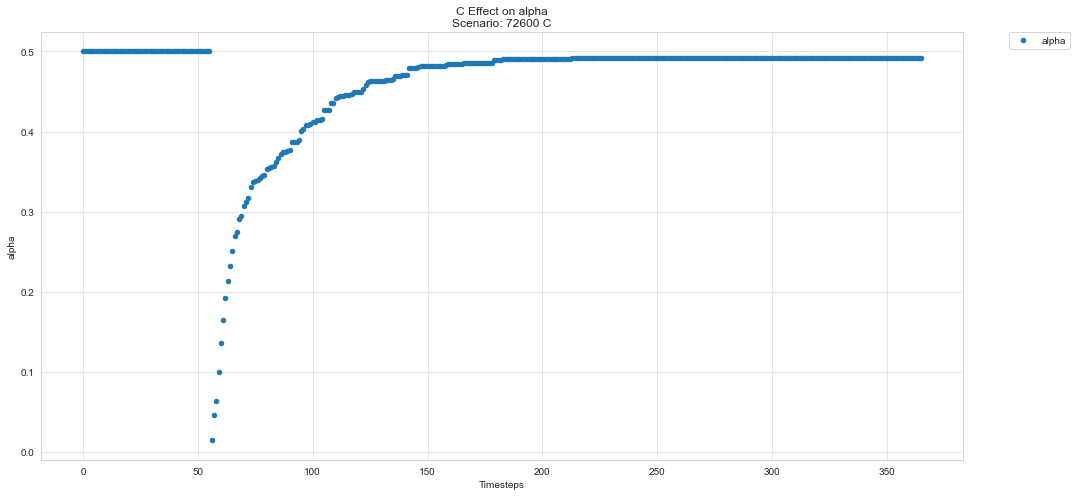

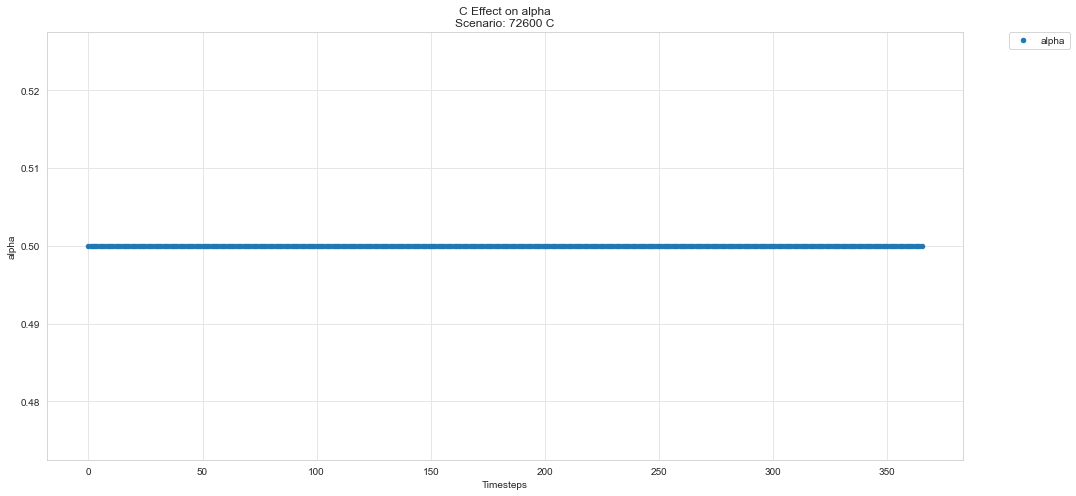

In [32]:
param_test_plot(experiments, config_ids, 'C','alpha')

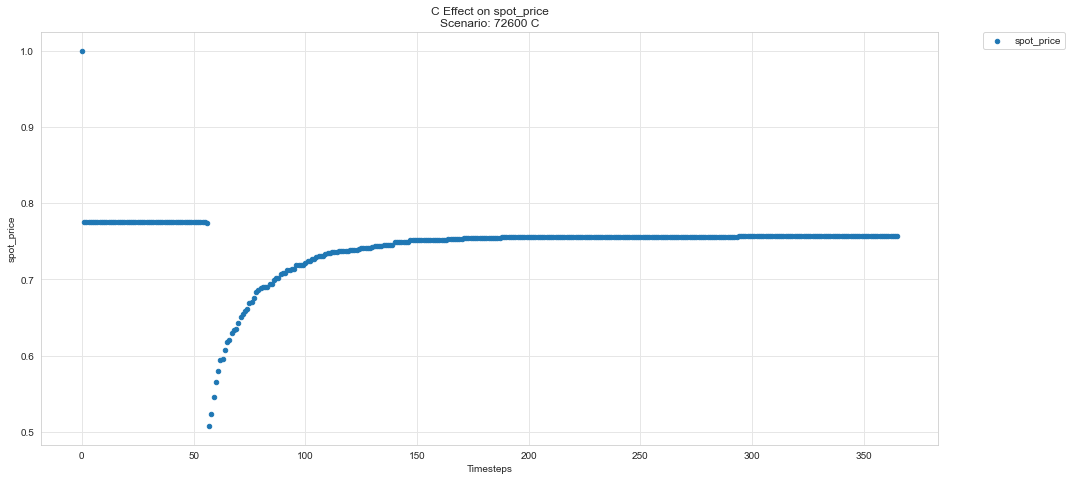

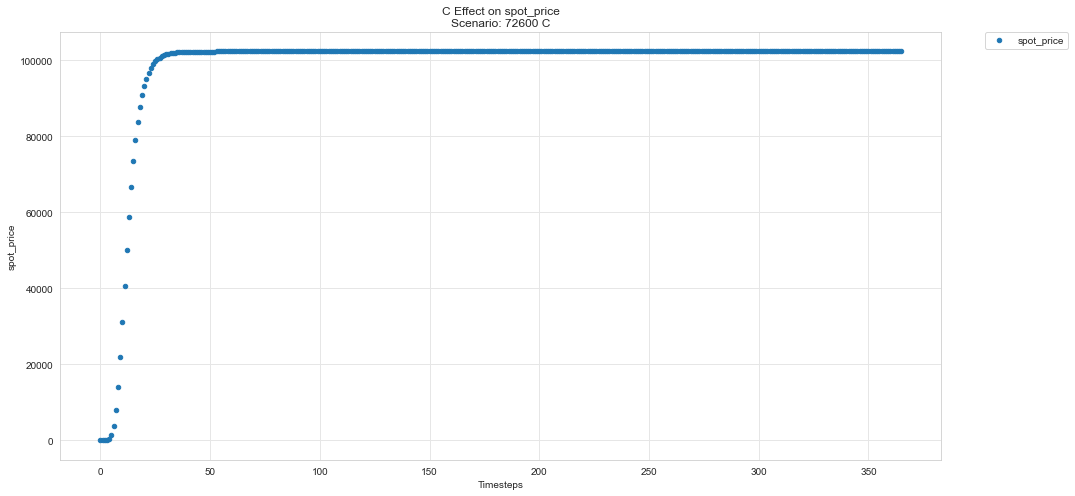

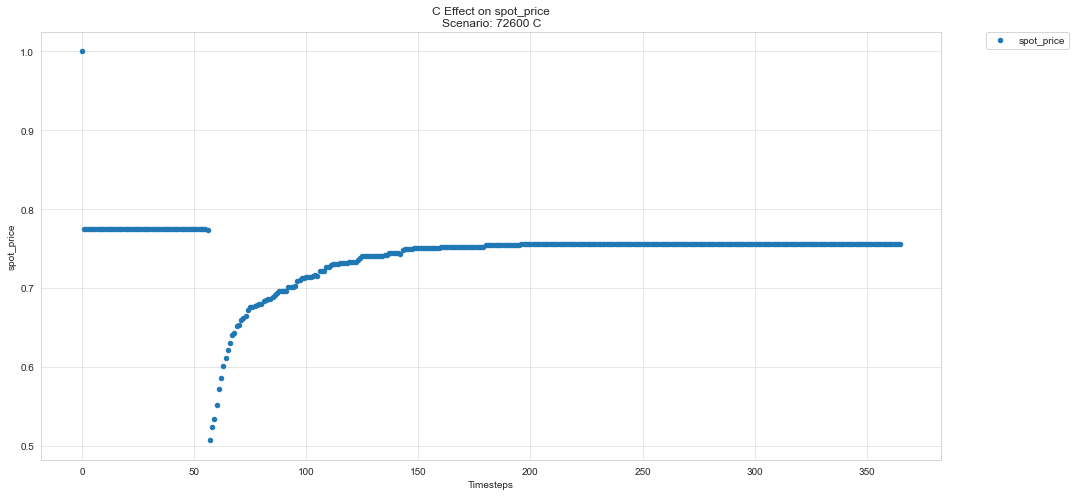

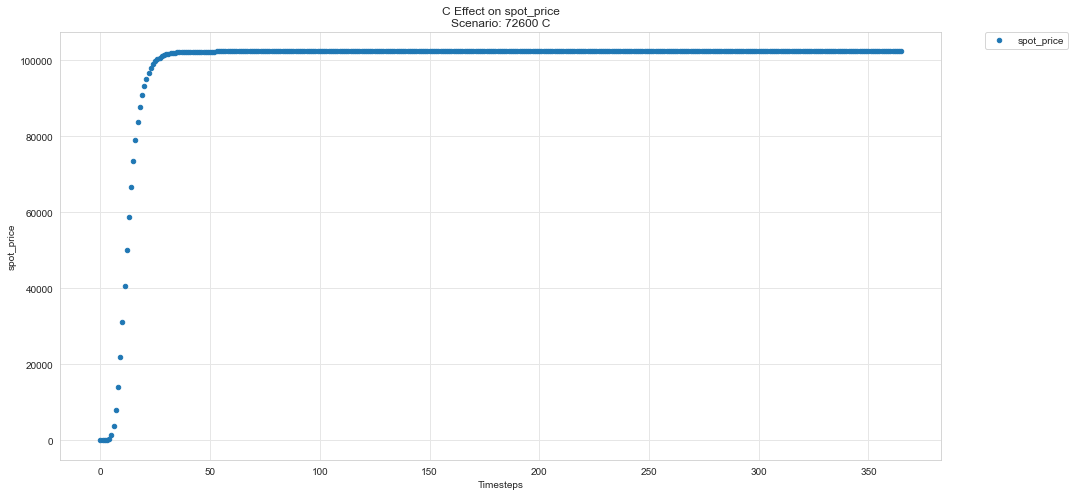

In [33]:
param_test_plot(experiments, config_ids, 'C', 'spot_price')

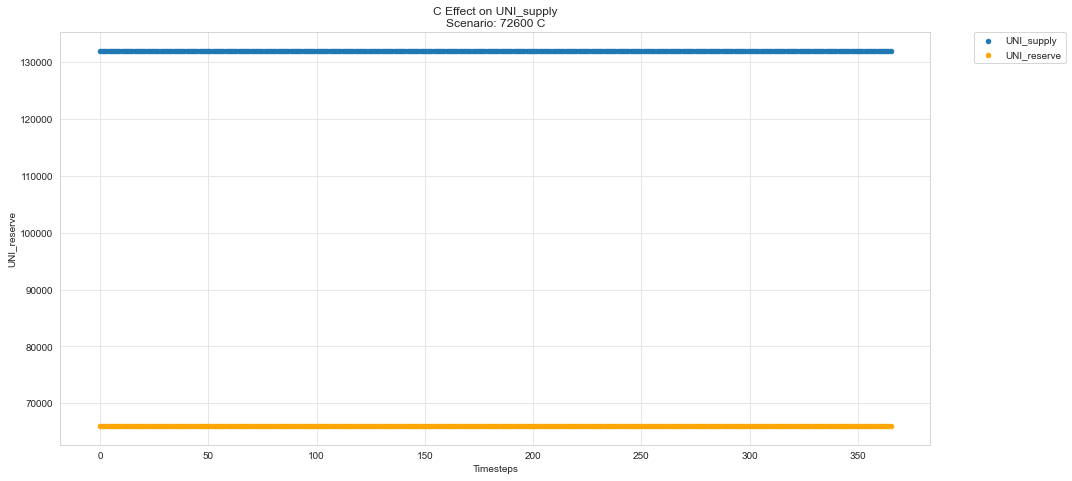

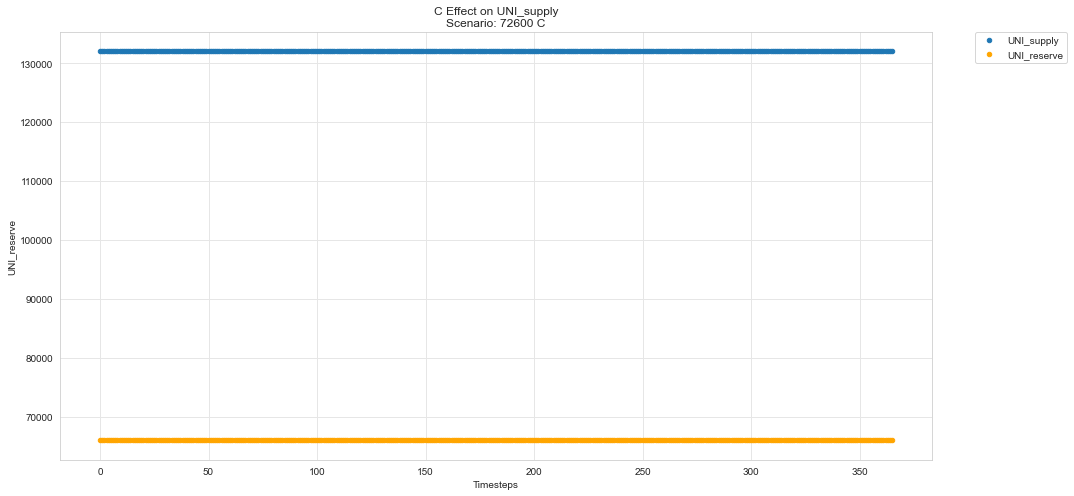

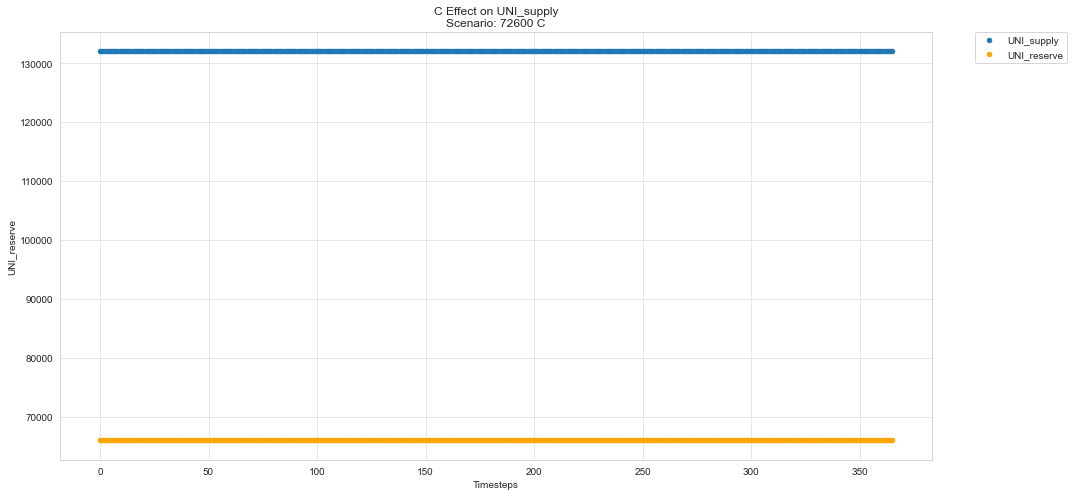

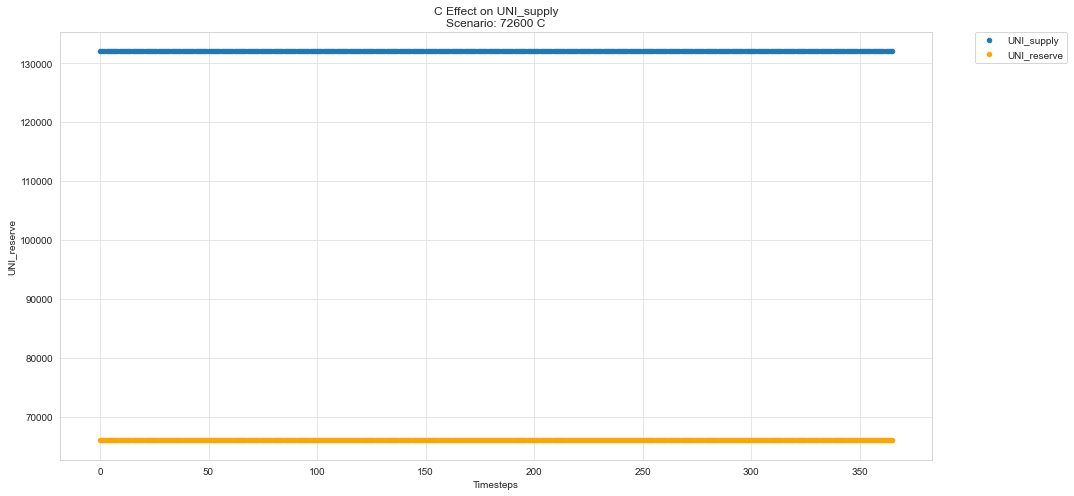

In [34]:
param_test_plot(experiments, config_ids, 'C','UNI_supply', 'UNI_reserve')

### Use for customizing plots

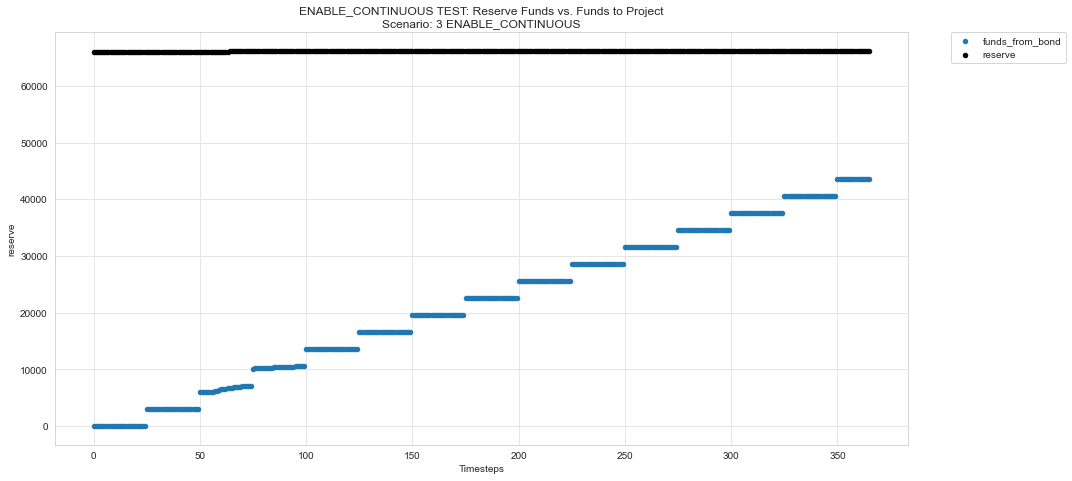

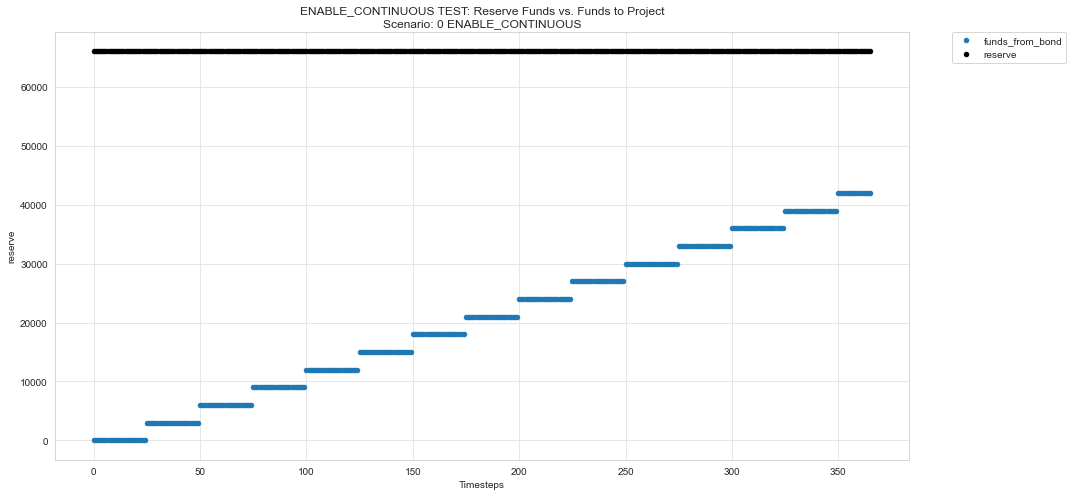

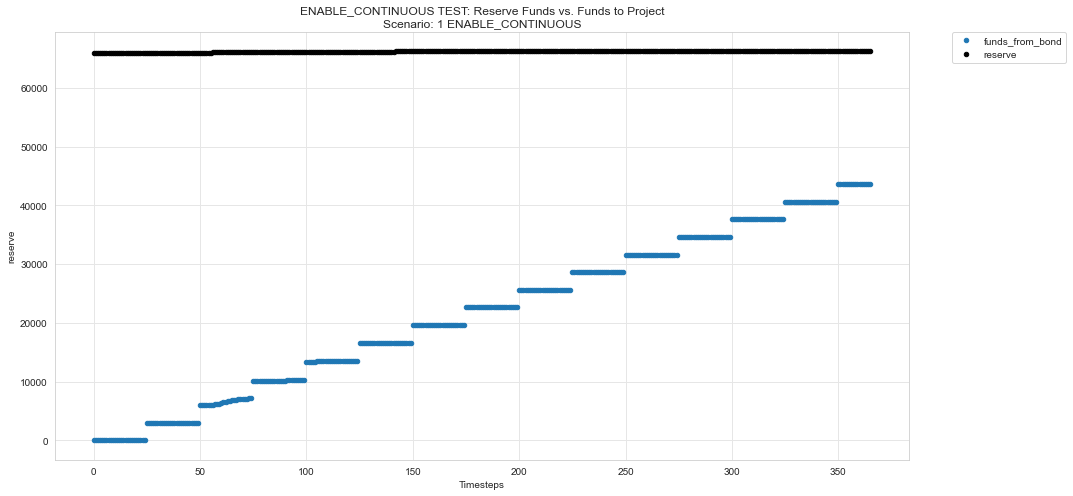

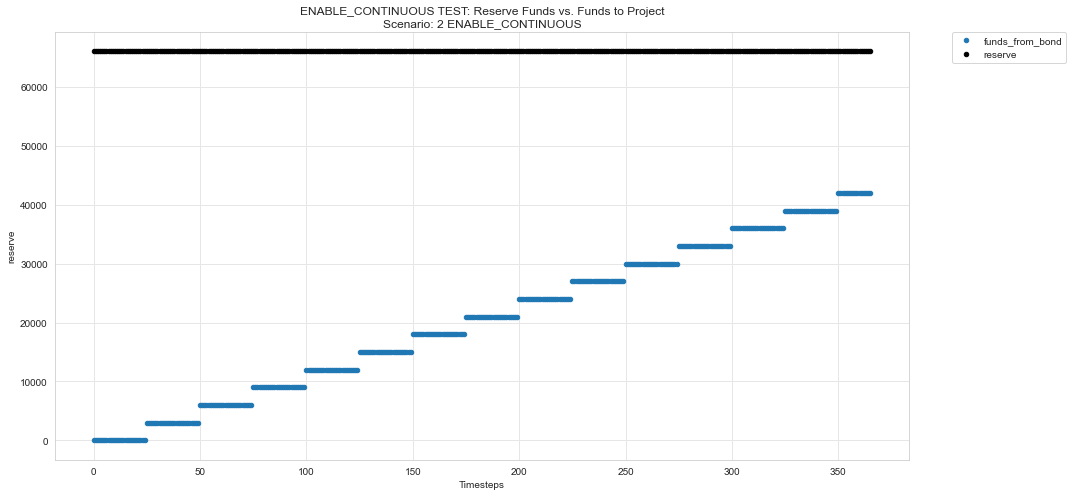

In [35]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['subset']
    cc_label = experiments.iloc[cc_idx]['subset']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['subset']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    df = sub_experiments.copy()
    colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

    ax = axs
    title = 'ENABLE_CONTINUOUS TEST: Reserve Funds vs. Funds to Project' + '\n' + 'Scenario: ' + str(cc_label)  + ' ENABLE_CONTINUOUS'
    # + 'Scenario: ' + str(cc_label)  + ' rules_price'
    ax.set_title(title)
    ax.set_ylabel('Funds')

    df.plot(x='timestep', y='funds_from_bond', label='funds_from_bond', ax=ax, legend=True, kind ='scatter')
    df.plot(x='timestep', y='reserve', label='reserve', ax=ax, legend=True, color = colors[5], kind ='scatter')

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_xlabel('Timesteps')
    ax.grid(color='0.9', linestyle='-', linewidth=1)

    plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()